<a href="https://colab.research.google.com/github/shanjay-GS/Data-Science/blob/main/Task%20two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Ice Cream.csv to Ice Cream.csv


In [9]:
import io
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


print("Descriptive Statistics:")
print(df[['Temperature', 'Revenue']].describe())

print("\nNumber of data points:", len(df))

print("\nMissing Values:")
print(df.isnull().sum())
missing_cols = [col for col in df.columns if df[col].isnull().any()]
if missing_cols:
    print("\nColumns with missing values:", missing_cols)

print("\nData Types:")
print(df.dtypes)

Descriptive Statistics:
       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000

Number of data points: 500

Missing Values:
Temperature    0
Revenue        0
dtype: int64

Data Types:
Temperature    float64
Revenue          int64
dtype: object


Correlation Coefficient between Temperature and Revenue: 0.9898407817416826


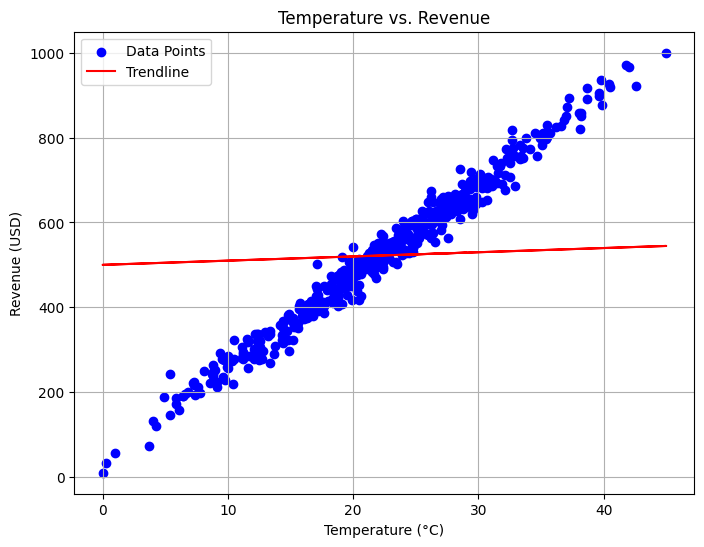

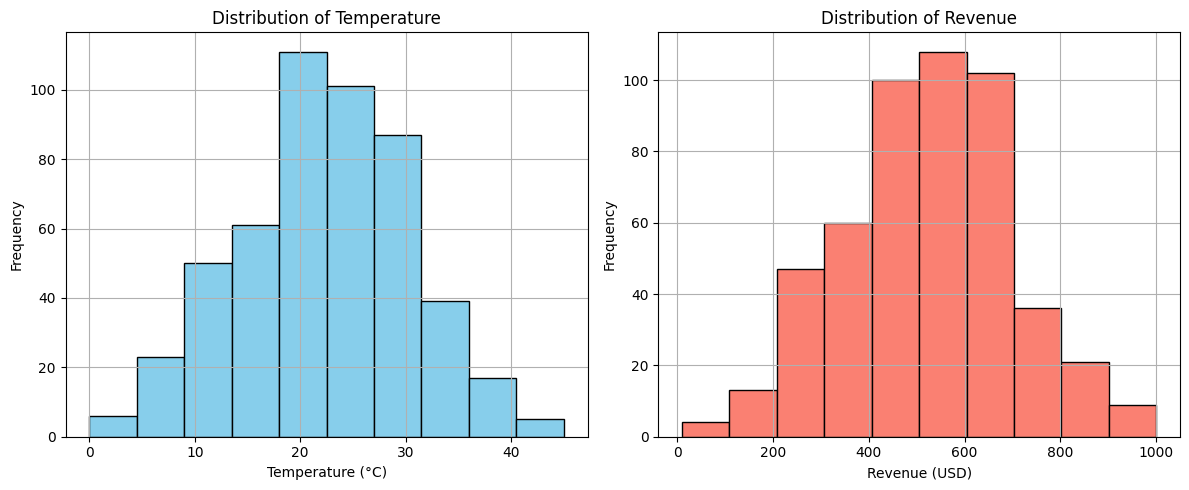

In [12]:


plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature'], df['Revenue'], color='blue', label='Data Points')
plt.plot(df['Temperature'], df['Temperature'] * df['Temperature'].corr(df['Revenue']) + (df['Revenue'].mean() - df['Temperature'].mean() * df['Temperature'].corr(df['Revenue'])), color='red', label='Trendline')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue (USD)')
plt.title('Temperature vs. Revenue')
plt.legend()
plt.grid(True)


correlation_coefficient = df['Temperature'].corr(df['Revenue'])
print(f"Correlation Coefficient between Temperature and Revenue: {correlation_coefficient}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Temperature'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.hist(df['Revenue'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('Revenue (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X = df[['Temperature']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_regressor = LinearRegression()
X_train_reshaped = X_train.values.reshape(-1, 1)
linear_regressor.fit(X_train_reshaped, y_train)
print("Linear Regression model trained successfully.")


Linear Regression model trained successfully.


In [18]:
from sklearn.metrics import mean_squared_error
linear_rmse = mean_squared_error(y_test, linear_predictions) ** 0.5

tree_rmse = mean_squared_error(y_test, tree_predictions) ** 0.5